In [1]:
#INPUT IMAGE

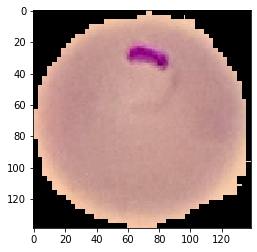

In [2]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
image = plt.imread(r'C:\Users\SHRUTI SURESHAN\Desktop\C33P1thinF_IMG_20150619_114756a_cell_181.png')
image.shape
plt.imshow(image)

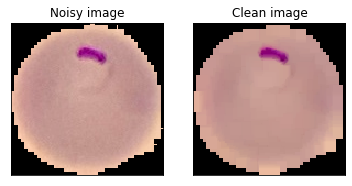

In [3]:
#PREPROCESSING
#NOISE REMOVAL
kernel = np.ones((9,9),np.uint8)
clean = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

plt.subplot(121),plt.imshow(image),plt.title('Noisy image')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(clean),plt.title('Clean image')
plt.xticks([]), plt.yticks([])
plt.show()

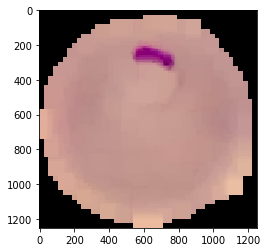

In [4]:
# SCALING
scale_percent=9
width=int(clean.shape[1]*scale_percent)
height=int(clean.shape[1]*scale_percent)
dimension=(width,height)
resized=cv2.resize(clean,dimension,interpolation=cv2.INTER_AREA)
plt.imshow(resized)

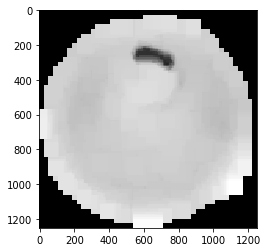

In [5]:
# RGB TO GRAY
gray = rgb2gray(resized)
plt.imshow(gray, cmap='gray')

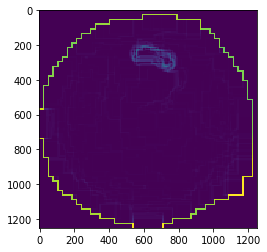

In [6]:
# MORPHOLOGICAL TRANSFORMATION
gradient = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel)
plt.imshow(gradient)

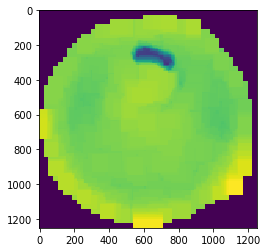

In [7]:
closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing)

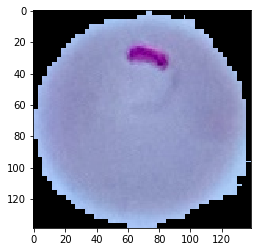

In [8]:
img = cv2.imread(r'C:\Users\SHRUTI SURESHAN\Desktop\C33P1thinF_IMG_20150619_114756a_cell_181.png')
plt.imshow(img)
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

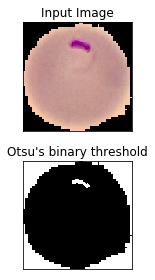

In [9]:
# SEGMENTATION

import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread(r'C:\Users\SHRUTI SURESHAN\Desktop\C33P1thinF_IMG_20150619_114756a_cell_181.png')
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# noise removal
kernel = np.ones((2,2),np.uint8)
#opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
closing = cv2.morphologyEx(thresh,cv2.MORPH_CLOSE,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(closing,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(sure_bg,cv2.DIST_L2,3)

# Threshold
ret, sure_fg = cv2.threshold(dist_transform,0.1*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.subplot(211),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(thresh, 'gray')
plt.imsave(r'C:\Users\SHRUTI SURESHAN\Desktop\thresh.png',thresh)
plt.title("Otsu's binary threshold"), plt.xticks([]), plt.yticks([])


plt.tight_layout()
plt.show()

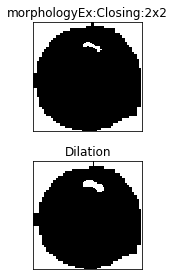

In [10]:
plt.subplot(211),plt.imshow(closing, 'gray')
plt.title("morphologyEx:Closing:2x2"), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(sure_bg, 'gray')
plt.imsave(r'C:\Users\SHRUTI SURESHAN\Desktop\dilation.png',sure_bg)
plt.title("Dilation"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()


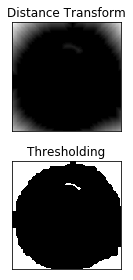

In [11]:
plt.subplot(211),plt.imshow(dist_transform, 'gray')
plt.title("Distance Transform"), plt.xticks([]), plt.yticks([])
plt.subplot(212),plt.imshow(sure_fg, 'gray')
plt.title("Thresholding"), plt.xticks([]), plt.yticks([])
plt.tight_layout()
plt.show()


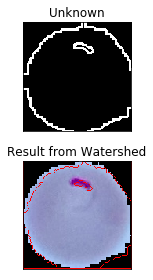

In [12]:
plt.subplot(211),plt.imshow(unknown, 'gray')
plt.title("Unknown"), plt.xticks([]), plt.yticks([])

plt.subplot(212),plt.imshow(img, 'gray')
plt.title("Result from Watershed"), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

In [13]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
# Technically not necessary in newest versions of jupyter
%matplotlib inline

In [14]:
my_data_dir="C:\\Users\\SHRUTI SURESHAN\\Desktop\\PROJECT\\CNN NEW DATASET\\cell_images"

In [15]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
os.listdir(my_data_dir) 

['test', 'train']

In [16]:
test_path = my_data_dir+'\\test\\'
train_path = my_data_dir+'\\train\\'

In [17]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [18]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [19]:
os.listdir(train_path+'\\parasitized')[0]

'aa.png'

In [20]:
para_cell = train_path+'\\parasitized'+'\\aa.png'

In [21]:
para_img= imread(para_cell)

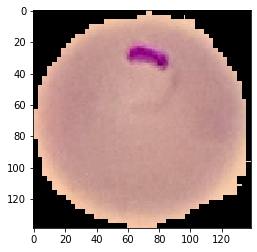

In [22]:
plt.imshow(para_img)

In [23]:
para_img.shape

(139, 139, 3)

In [24]:
os.listdir(train_path+'\\uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

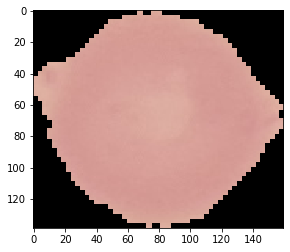

In [25]:
uninfected_cell = train_path+'\\uninfected'+'\\C100P61ThinF_IMG_20150918_144104_cell_128.png'
uninfected_img= imread(uninfected_cell)
plt.imshow(uninfected_img)

In [26]:
len(os.listdir(train_path+'\\parasitized'))

12481

In [27]:
len(os.listdir(train_path+'\\uninfected'))

12480

In [28]:
para_img.shape

(139, 139, 3)

In [29]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'\\uninfected'):
    
    img = imread(test_path+'\\uninfected'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

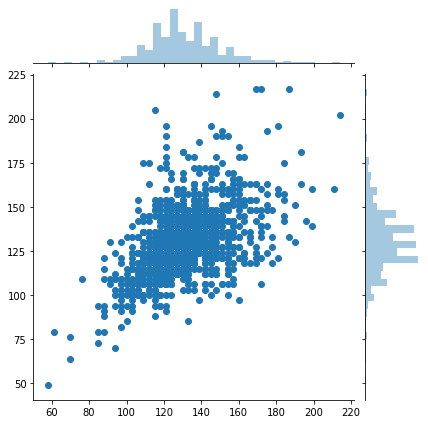

In [30]:
sns.jointplot(dim1,dim2)

In [31]:
np.mean(dim1)

130.92538461538462

In [32]:
np.mean(dim2)

130.75

In [33]:
image_shape = (130,130,3)

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module tensorflow.python.keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Arguments:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0

In [36]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

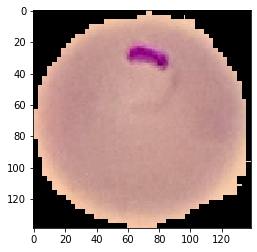

In [37]:
plt.imshow(para_img)

In [38]:
image_gen.flow_from_directory(train_path)

Found 24959 images belonging to 2 classes.


In [39]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [41]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [43]:
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [45]:
batch_size = 16

In [46]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24959 images belonging to 2 classes.


In [47]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [48]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
#results = model.fit_generator(train_image_gen,epochs=20,
#                             validation_data=test_image_gen,
#                             callbacks=[early_stop])

In [51]:
from tensorflow.keras.models import load_model

In [52]:
model=load_model('malaria_detector.h5')

In [53]:
model.evaluate_generator(test_image_gen)

[0.220550969516456, 0.9330769]

In [54]:
model.metrics_names

['loss', 'accuracy']

In [55]:
pred_probabilities = model.predict_generator(test_image_gen)

In [56]:
pred_probabilities

array([[2.9802322e-07],
       [1.7881393e-07],
       [4.9948692e-05],
       ...,
       [9.5621288e-01],
       [9.6568871e-01],
       [9.5189726e-01]], dtype=float32)

In [57]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [58]:
predictions = pred_probabilities > 0.5

In [59]:
# Numpy can treat this as True/False for us
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [60]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1300
           1       0.93      0.96      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



In [61]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1204,   96],
       [  58, 1242]], dtype=int64)

In [62]:
para_cell

'C:\\Users\\SHRUTI SURESHAN\\Desktop\\PROJECT\\CNN NEW DATASET\\cell_images\\train\\\\parasitized\\aa.png'

In [63]:
from tensorflow.keras.preprocessing import image

In [81]:
my_image = image.load_img(para_cell,target_size=image_shape)  #input 
my_image = image.img_to_array(my_image)
my_image = np.expand_dims(my_image, axis=0)

In [83]:
my_image = image.load_img(uninfected_cell,target_size=image_shape)  #input 
my_image = image.img_to_array(my_image)
my_image = np.expand_dims(my_image, axis=0)

In [84]:
from tkinter import *
from tkinter import ttk
from tkinter import filedialog
 
class Root(Tk):
    def __init__(self):
        super(Root, self).__init__()
        self.title("Python Tkinter Dialog Widget")
        self.minsize(640, 400)
        self.labelFrame = ttk.LabelFrame(self, text = "Open File")
        self.labelFrame.grid(column = 0, row = 1, padx = 20, pady = 20)
        self.button()
        self.button1() 
 
    def button(self):
        self.button = ttk.Button(self.labelFrame, text = "Browse A File",command = self.fileDialog)
        self.button.grid(column = 1, row = 1)
  
    def fileDialog(self):
        self.filename = filedialog.askopenfilename(initialdir =  "/", title = "Select A File", filetype =
        (("png files","*.png"),("all files","*.*")) )
        self.label = ttk.Label(self.labelFrame, text = "")
        self.label.grid(column = 1, row = 2)
        self.label.configure(text = self.filename)
 
    def button1(self):
        self.button = ttk.Button(self.labelFrame, text = "submit", command = self.get_prediction)
        self.button.grid(column = 1, row = 20)
        
    def get_prediction(self):
        s=model.predict(my_image)
        if(s==[[1.]]):
            self.label.configure(text="NON PARASITIC")
        else:
            self.label.configure(text="PARASITIC") 
root = Root()
root.mainloop()